In [1]:
import json
# import pandas as pd
import numpy as np

In [2]:
REVIEW_PATH = "../data/yelp_academic_dataset_review.json"

def read_data(limit: int) -> np.ndarray:
    lengths = []
    with open(REVIEW_PATH) as f:
        for idx, line in enumerate(f):
            if idx >= limit:
                break
            lengths.append(len(json.loads(line)["text"]))

    # lengths = np.array([[l] for l in lengths])
    lengths = np.array(lengths)
    return lengths

lengths = read_data(1000)

# Algorithm

```
Input : Set of points Pi
Output: Set of clusters Cˆ

Select K initial centroids;
repeat
	Assign all points to the closest centroid;
	Recompute centroids;
until Centroids don’t change;
```

In [3]:
import random
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self, k: int, seed: int = 0):
        self.k = k
        random.seed(seed)

    def compute_mean(self, cluster):
        if len(cluster) == 0:
            return 0
        return sum(cluster) / len(cluster)

    def fit(self, data, max_iterations=100):
        centroids = random.sample(data, self.k)
        clusters = {i: [] for i in range(self.k)}
        labels = []

        for _ in range(max_iterations):
            labels = []
            for value in data:
                closest_centroid_idx = 0
                closest_distance = abs(centroids[0] - value)
                for idx, centroid in enumerate(centroids[1:], start=1):
                    distance = abs(centroid - value)
                    if distance < closest_distance:
                        closest_centroid_idx = idx
                        closest_distance = distance
                labels.append(closest_centroid_idx)
                clusters[closest_centroid_idx].append(value)

            new_centroids = [self.compute_mean(cluster) for cluster in clusters.values()]
            sse = sum((value - centroids[label]) ** 2 for value, label in zip(data, labels))
            print(f"SSE: {sse}")
            if new_centroids == centroids:
                break

            centroids = new_centroids

        self.centroids = centroids
        self.labels = labels

In [4]:
def plot(data, labels):
	colors = ['red', 'green', 'blue']

	for i, cluster in enumerate(labels):
		plt.scatter(data[i], [cluster], c=colors[int(cluster)], label=f'Cluster {cluster+1}')

	plt.show()

In [5]:
kmeans = KMeansClustering(k=3)
kmeans.fit(list(lengths))

SSE: 175536386
SSE: 125924347.8025705
SSE: 114652744.85696016
SSE: 108346014.13910381
SSE: 104026751.11248317
SSE: 100841101.45776533
SSE: 98490780.04310037
SSE: 96596977.94813961
SSE: 94962214.71017312
SSE: 93564259.12731645
SSE: 92297436.59107345
SSE: 91139790.16153394
SSE: 90108769.44930346
SSE: 89184114.64930817
SSE: 88294591.773975
SSE: 87513805.51515616
SSE: 86809326.70986623
SSE: 86128354.26424697
SSE: 85508943.44003451
SSE: 84882013.3317994
SSE: 84288272.2943469
SSE: 83760159.30648844
SSE: 83280492.22146511
SSE: 82820008.60932857
SSE: 82379715.88217023
SSE: 81953581.01907215
SSE: 81554179.7121501
SSE: 81175626.93729457
SSE: 80805530.62588648
SSE: 80444580.30002101
SSE: 80090389.22196992
SSE: 79759373.91732717
SSE: 79442290.41178054
SSE: 79147552.73549461
SSE: 78871305.60718715
SSE: 78609360.59686342
SSE: 78350088.0631725
SSE: 78087128.51366405
SSE: 77821310.9093999
SSE: 77565669.72897494
SSE: 77315937.0137597
SSE: 77079749.2868677
SSE: 76854439.64834894
SSE: 76634323.59148559
S

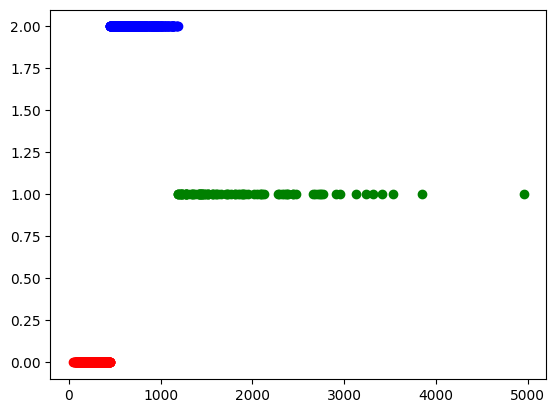

In [6]:
plot(lengths, kmeans.labels)